- For this practical work, the trainees will develop a Python program that is able to implement the <b>stochastic gradient descent</b> in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.
- We will modify our code from Practical Work 1&2 to acheive the objective from this Practical work.

### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Single Variable Linear Regression:

### For this practical work you will generate a perfect regression data to see the difference between different optimizers.
- To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b>.
- The values in <b>X</b> are <b>50 data points</b> equally distributed between <b>0</b> and <b>20</b>.
- You should use <b>np.linspace(0,20)</b> to generate X data points. 
- The values in <b>y</b> will be generated by the equation:
$\mathbf{y_i = a*x_i + b ; a = -2, b = 1}$.

In [2]:
X = np.linspace(0,20)
print(f'X:\n {X}')

X:
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
a=-2
b=1
y=a*X+b
print(f'y:\n {y}')

y:
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


In [7]:
def generate_Xy():
    X = np.linspace(0,20)
    a=-2
    b=1
    y=a*X+b
    return X,y
X,y = generate_Xy()

### Plot the data (scatter plot of X,y)

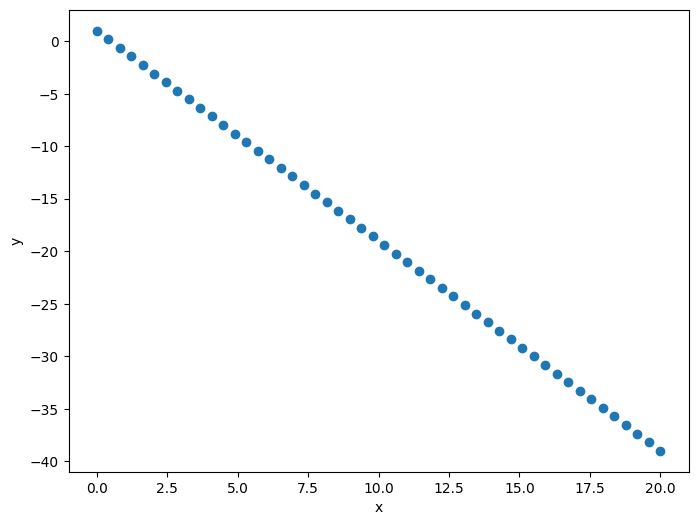

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Copy your single variable linear regression function you created in practical work 1

In [9]:
def GD_LR_1var(X,y,alpha=0.01,max_iters=500,grad_check=0.001,conv_check=0.001):
    theta_0 = 0
    theta_1 = 0

    m = X.shape[0]


    all_theta_0 =[]
    all_theta_1 =[]
    loss = []

    
    for i in range(max_iters):
        print(f'****************** Iteration {i} ********************\n')
        
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        h= theta_0 + theta_1 * X
        print(f'h(x):\n{h}\n')
        
        e = h-y
        j=(e@e)/(2*m)
        loss.append(j)
        print(f'Error Vector:\n{e}\n')
        print(f'j = {j}\n')
        
        d_theta_0 = e.sum()/m
        d_theta_1 = (e@X)/m
        grad = np.array([[d_theta_0],
                         [d_theta_1]])
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector:\n{grad}\n')
        print(f'Gradient Vector Norm:\n{grad_norm}\n')
        
        
        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_0_Opt : {opt_theta_0}')
            print(f'theta_1_Opt : {opt_theta_1}\n')
            print(f'Error Vector:\n{e}\n')
            print(f'Cost = {j}\n')
            print(f'h(x) = y_predict:\n{h}\n')
            print(f'y_actual:\n{y}\n')
            break
        elif i>0 and np.absolute(loss[i-1] - loss[i])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_0_Opt : {theta_0}')
            print(f'theta_1_Opt : {theta_1}\n')
            print(f'Error Vector:\n{e}\n')
            print(f'Cost = {j}\n')
            print(f'h(x) = y_predict:\n{h}\n')
            print(f'y_actual:\n{y}\n')
            break

        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        print(f'theta_0_new : {theta_0}')
        print(f'theta_1_new : {theta_1}\n')
    
    return all_theta_0,all_theta_1,loss

In [10]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def calc_best_fit(Th0,Th1,X):
    y_best_fit= Th0 + Th1 * X
    return y_best_fit

def plotReg(X,y,y_pred):
    plt.figure(figsize =(10,8))
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X,y_pred,'r*-')
    plt.show()

##### The following results uses the hyper-parameters alpha = 0.001, max. epochs = 500, and 0.001 for both stop conditions.

In [11]:
all_theta_0,all_theta_1,loss = GD_LR_1var(X,y,alpha=0.001)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204087

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.019
theta_1_new : -0.259387755

### Evaluate your model results using r2_score and plot the learning cuvers 

In [12]:
from sklearn.metrics import r2_score

r2_score: 0.9975950054190024


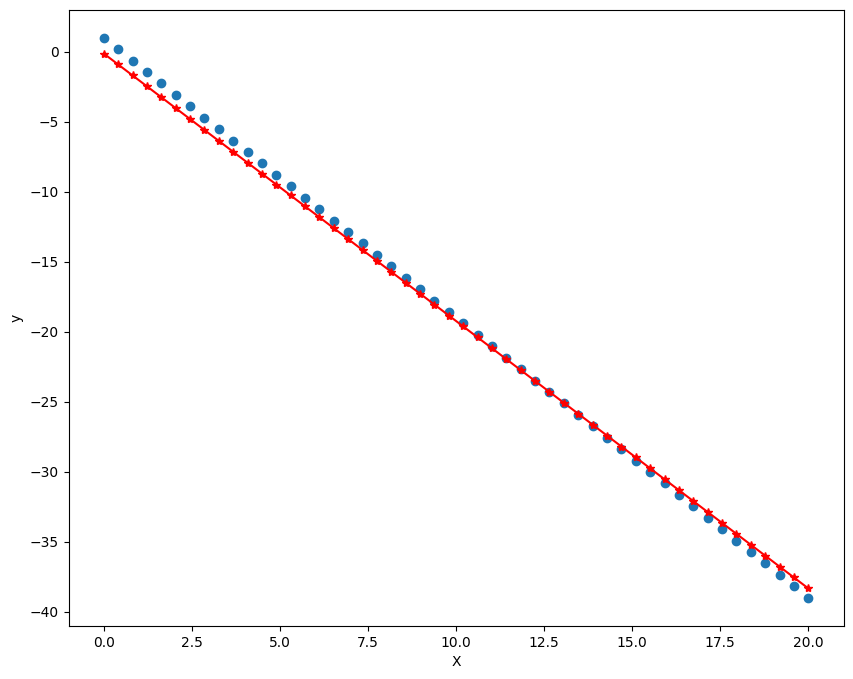

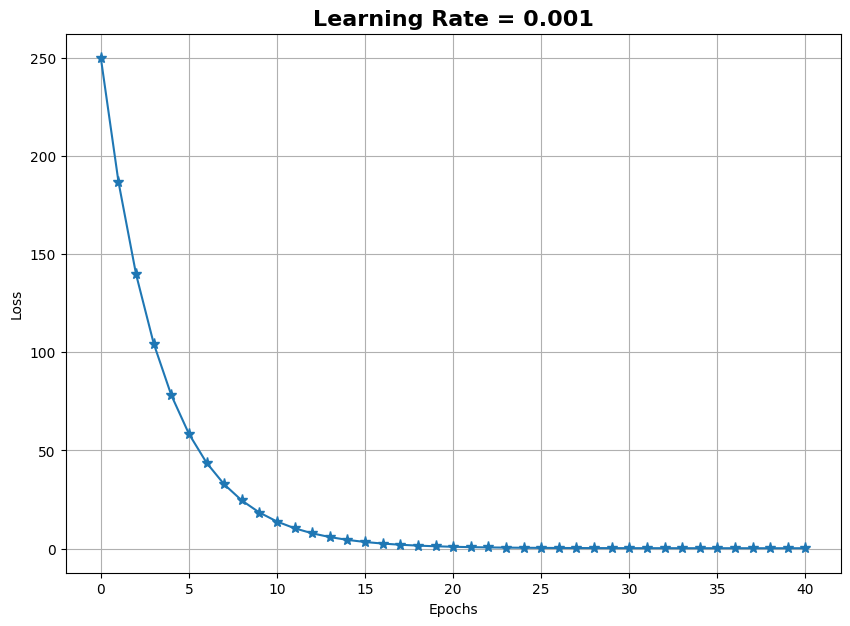

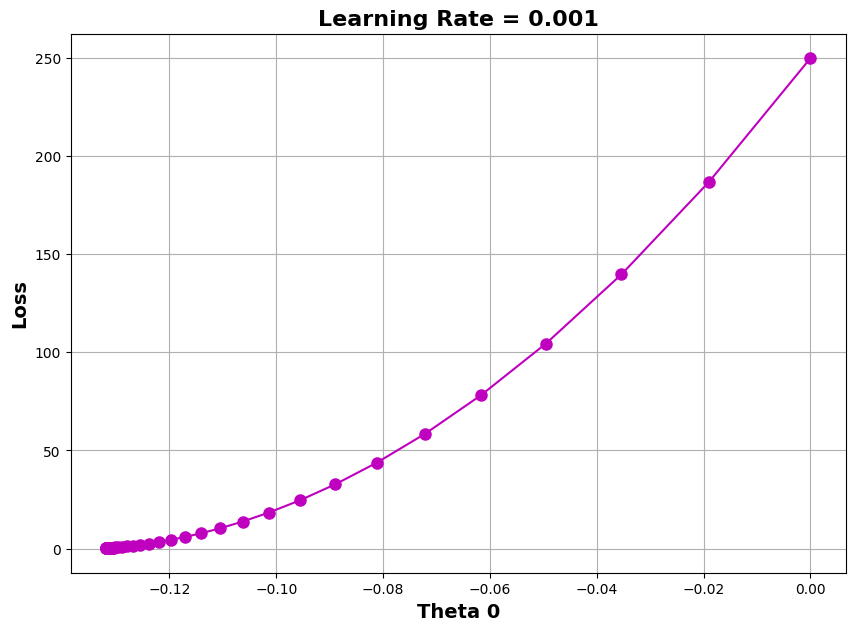

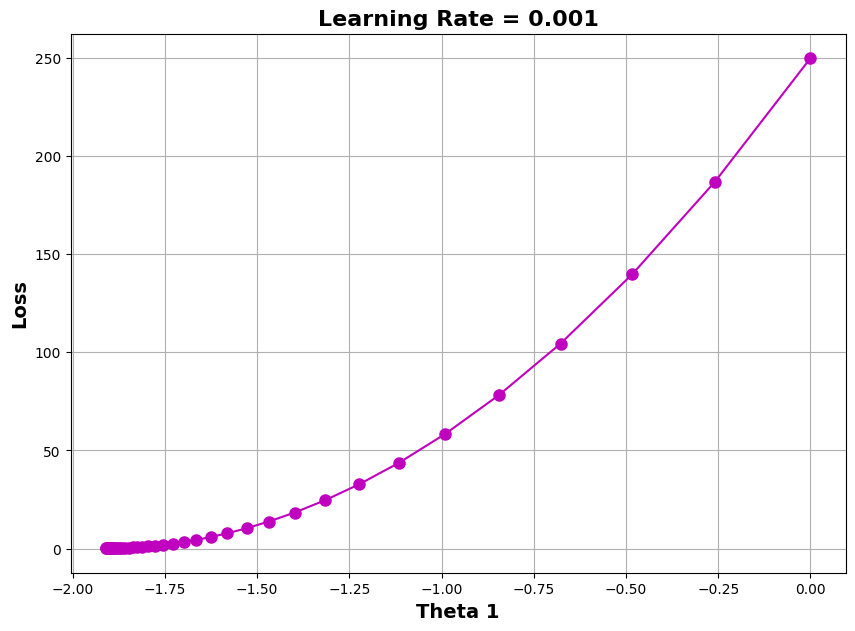

In [13]:
y_best_fit= calc_best_fit(all_theta_0[-1],all_theta_1[-1],X)
print('r2_score:',r2_score(y,y_best_fit))

plotReg(X,y,y_best_fit)
plot_loss(loss,'Learning Rate = 0.001')
plot_theta_loss(all_theta_0,'Theta 0',loss,'Learning Rate = 0.001')
plot_theta_loss(all_theta_1,'Theta 1',loss,'Learning Rate = 0.001')

## Stochastic GD for Single Variable LR Implementation
### Step 1: Shuffle your data

#### Concatenate X,y data in one array using np.concatenate()

In [16]:
x_new=X.reshape(-1,1)
y_new=y.reshape(-1,1)
d = np.concatenate((x_new,y_new),axis=1)
print(f'concatenated data:\n {d}')


concatenated data:
 [[  0.           1.        ]
 [  0.40816327   0.18367347]
 [  0.81632653  -0.63265306]
 [  1.2244898   -1.44897959]
 [  1.63265306  -2.26530612]
 [  2.04081633  -3.08163265]
 [  2.44897959  -3.89795918]
 [  2.85714286  -4.71428571]
 [  3.26530612  -5.53061224]
 [  3.67346939  -6.34693878]
 [  4.08163265  -7.16326531]
 [  4.48979592  -7.97959184]
 [  4.89795918  -8.79591837]
 [  5.30612245  -9.6122449 ]
 [  5.71428571 -10.42857143]
 [  6.12244898 -11.24489796]
 [  6.53061224 -12.06122449]
 [  6.93877551 -12.87755102]
 [  7.34693878 -13.69387755]
 [  7.75510204 -14.51020408]
 [  8.16326531 -15.32653061]
 [  8.57142857 -16.14285714]
 [  8.97959184 -16.95918367]
 [  9.3877551  -17.7755102 ]
 [  9.79591837 -18.59183673]
 [ 10.20408163 -19.40816327]
 [ 10.6122449  -20.2244898 ]
 [ 11.02040816 -21.04081633]
 [ 11.42857143 -21.85714286]
 [ 11.83673469 -22.67346939]
 [ 12.24489796 -23.48979592]
 [ 12.65306122 -24.30612245]
 [ 13.06122449 -25.12244898]
 [ 13.46938776 -25.9387

#### Shuffle your data using np.random.shuffle()
#### Set random seed to 101 to obtain the same result as the one we do here

In [17]:
np.random.seed(101)
np.random.shuffle(d)
print(f'shuffeled data:\n {d}')


shuffeled data:
 [[ 15.10204082 -29.20408163]
 [  5.71428571 -10.42857143]
 [  8.57142857 -16.14285714]
 [ 13.06122449 -25.12244898]
 [  8.97959184 -16.95918367]
 [  0.40816327   0.18367347]
 [ 10.6122449  -20.2244898 ]
 [ 18.7755102  -36.55102041]
 [ 17.14285714 -33.28571429]
 [ 19.18367347 -37.36734694]
 [  6.53061224 -12.06122449]
 [  9.79591837 -18.59183673]
 [  2.85714286  -4.71428571]
 [ 18.36734694 -35.73469388]
 [  7.34693878 -13.69387755]
 [  1.2244898   -1.44897959]
 [ 16.73469388 -32.46938776]
 [ 12.24489796 -23.48979592]
 [  6.12244898 -11.24489796]
 [  8.16326531 -15.32653061]
 [ 17.55102041 -34.10204082]
 [ 15.51020408 -30.02040816]
 [ 17.95918367 -34.91836735]
 [ 15.91836735 -30.83673469]
 [  4.08163265  -7.16326531]
 [ 20.         -39.        ]
 [ 10.20408163 -19.40816327]
 [ 13.46938776 -25.93877551]
 [ 14.69387755 -28.3877551 ]
 [  0.81632653  -0.63265306]
 [ 11.02040816 -21.04081633]
 [ 13.87755102 -26.75510204]
 [ 14.28571429 -27.57142857]
 [  3.26530612  -5.5306122

#### Reassign first column to variable X and second column to variable y.

In [18]:
x_shuffeled =d[:,0]
print(f'x_shuffeled:\n{x_shuffeled}')
y_shuffeled =d[:,1]
print(f'y_shuffeled:\n{y_shuffeled}')


x_shuffeled:
[15.10204082  5.71428571  8.57142857 13.06122449  8.97959184  0.40816327
 10.6122449  18.7755102  17.14285714 19.18367347  6.53061224  9.79591837
  2.85714286 18.36734694  7.34693878  1.2244898  16.73469388 12.24489796
  6.12244898  8.16326531 17.55102041 15.51020408 17.95918367 15.91836735
  4.08163265 20.         10.20408163 13.46938776 14.69387755  0.81632653
 11.02040816 13.87755102 14.28571429  3.26530612  7.75510204 11.83673469
  4.89795918  2.04081633  0.         11.42857143  1.63265306 16.32653061
  5.30612245  3.67346939 19.59183673  9.3877551   2.44897959  6.93877551
  4.48979592 12.65306122]
y_shuffeled:
[-29.20408163 -10.42857143 -16.14285714 -25.12244898 -16.95918367
   0.18367347 -20.2244898  -36.55102041 -33.28571429 -37.36734694
 -12.06122449 -18.59183673  -4.71428571 -35.73469388 -13.69387755
  -1.44897959 -32.46938776 -23.48979592 -11.24489796 -15.32653061
 -34.10204082 -30.02040816 -34.91836735 -30.83673469  -7.16326531
 -39.         -19.40816327 -25.938

### Step 2: Parameters initialization (theta0 = 0, theta1 = 0, alpha = 0.001)
- In this step we will also get the number of data points <b>(m)</b>.
- We will also define empty lists to save losses, thetas in all iterations.

In [29]:
th0=0
th1=0
alpha=0.001
m= X.shape[0]

all_th0=[]
all_th1=[]
loss=[]

### Step 3: Claculate the prediction for the first data point

In [30]:
h = th0+th1*x_shuffeled[0]
print(f'h(0)={h}')

h(0)=0.0


### Step 4: Claculate the error for the first data point prediction h(0) - y(0)

In [31]:
e= h -y_shuffeled[0]
print(f'e(0)= {e}')
 

e(0)= 29.20408163265306


### Step 5: Claculate the cost for the first data point prediction $\mathbf{\frac{e^2}{2}}$

In [32]:
j = e **2/2
print(f'j(0)=  {j}')

j(0)=  426.4391920033319


### Step 6: Claculate the gradient components for the first data point 
#### d_th0 = e
#### d_th1 = e * X[0]

In [33]:
d_th0=e
d_th1=e*x_shuffeled[0]
grad = np.array([[d_th0],
                 [d_th1]])
print(f'gradient_vector:\n  {grad}')

gradient_vector:
  [[ 29.20408163]
 [441.04123282]]


### Step 7: Update theta values

In [34]:
th0= th0 - alpha*d_th0
th1= th1 - alpha*d_th1
print(f'theta_0_new:{th0}')
print(f'theta_1_new:{th1}')

theta_0_new:-0.02920408163265306
theta_1_new:-0.4410412328196585


### Step 8: Iterate through all data points to finish the first epoch
#### Save thetas and loss each iteration i.e. with each update.
#### Reinitialize parameters in the begining: th0 = 0, th1 = 0.
#### Plot the learning curves to explore parameters update in single epoch.

In [35]:
theta_0 = 0
theta_1 = 0
alpha = 0.001

m = X.shape[0]

all_theta_0 =[]
all_theta_1 =[]
loss = []
for k in range(m):
    all_theta_0.append(theta_0)
    all_theta_1.append(theta_1)

    h= theta_0 + theta_1 * x_shuffeled[k]

    e = h-y_shuffeled[k]
    j=(e**2)/(2)
    loss.append(j)


    d_theta_0 = e
    d_theta_1 = (e*x_shuffeled[k])

    theta_0 = theta_0 - alpha * d_theta_0
    theta_1 = theta_1 - alpha * d_theta_1

In [36]:
def plot_loss_iter(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

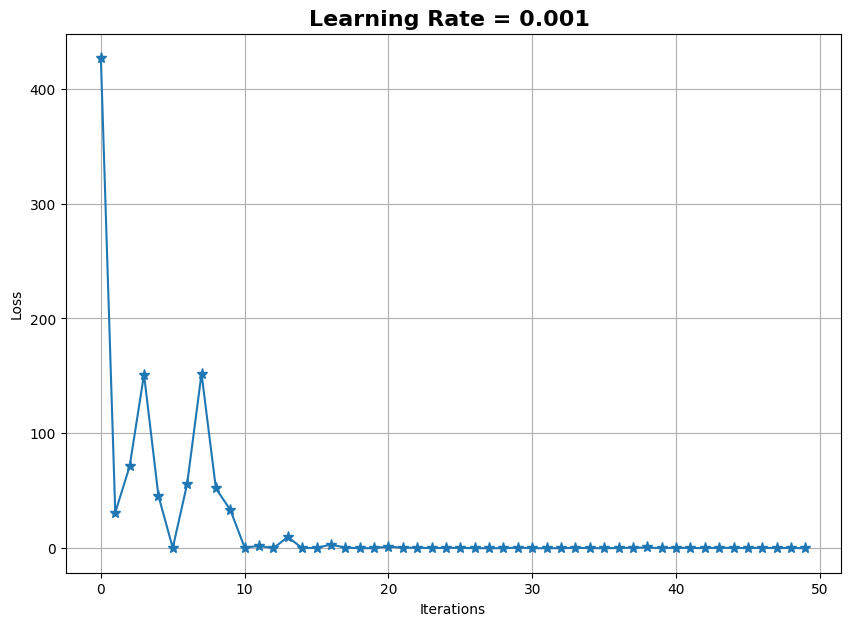

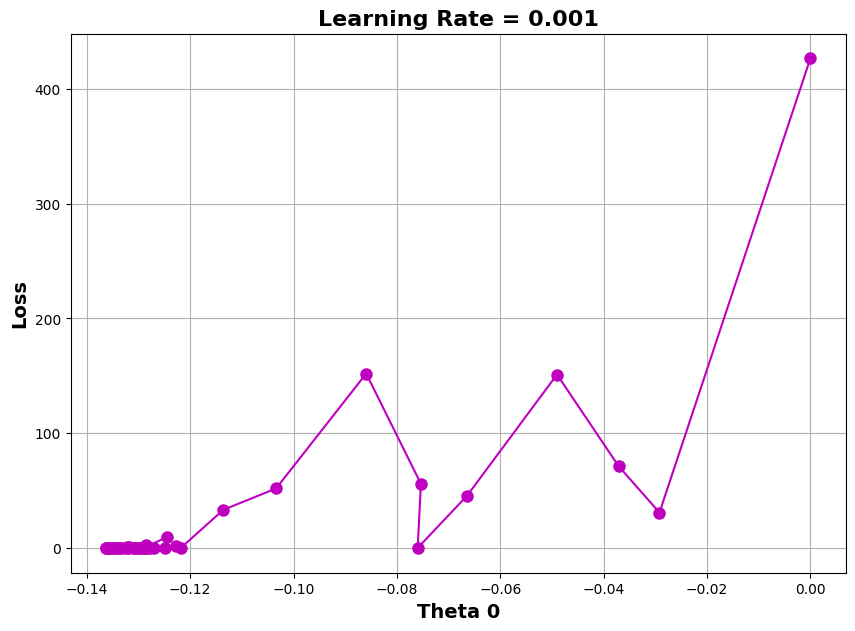

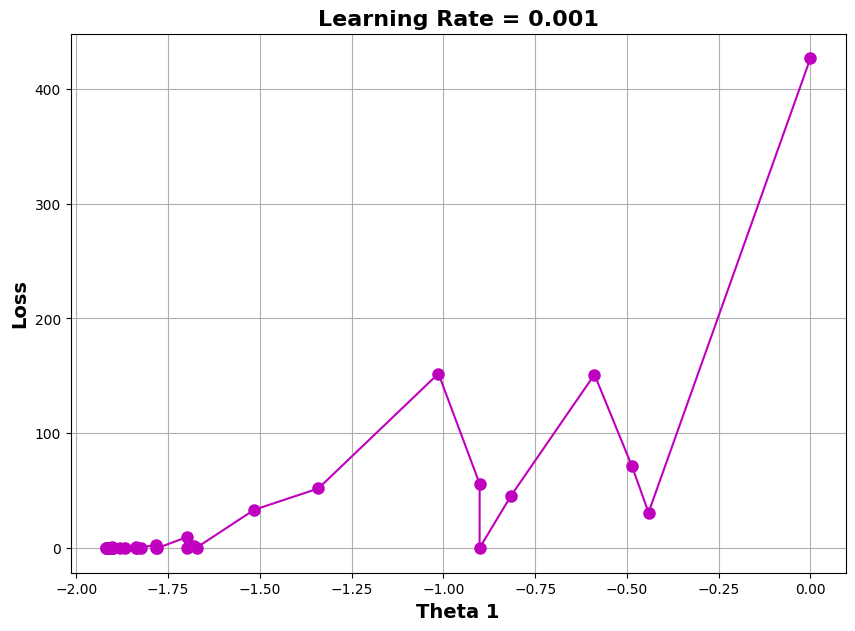

In [37]:
plot_loss_iter(loss,'Learning Rate = 0.001 ')
plot_theta_loss(all_theta_0,'Theta 0',loss,'Learning Rate = 0.001')
plot_theta_loss(all_theta_1,'Theta 1',loss,'Learning Rate = 0.001')

### Step 9: Make outer loop to perform as many epochs as you need to reach the stop conditions



##### The following results uses the hyper-parameters alpha = 0.001, max. epochs = 500, and 0.001 for both stop conditions.

In [42]:
X,y = generate_Xy()
alpha=0.001
max_epochs=500
grad_check=0.001
conv_check=0.001

np.random.seed(101)
D = np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
np.random.shuffle(D)
X = D[:,0]
y = D[:,1]

theta_0 = 0
theta_1 = 0

m = X.shape[0]


all_theta_0 =[]
all_theta_1 =[]
loss = []

    
for i in range(max_epochs):
    print(f'****************** Epoch {i} ********************\n')

    for k in range(m):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)

        h= theta_0 + theta_1 * X[k]

        e = h-y[k]
        j=(e**2)/(2)
        loss.append(j)


        d_theta_0 = e
        d_theta_1 = (e*X[k])

        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1

    grad = np.array([[d_theta_0],
                     [d_theta_1]])
    print(f'j = {j}\n')
    grad_norm = np.linalg.norm(grad)
    print(f'Gradient Vector:\n{grad}\n')
    print(f'Gradient Vector Norm:\n{grad_norm}\n')
    opt_theta_0=all_theta_0[-1]
    opt_theta_1=all_theta_1[-1]
    print(f'theta_0_new : {opt_theta_0}')
    print(f'theta_1_new : {opt_theta_1}\n')

    if grad_norm <grad_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} epochs\n')
        print(f'theta_0_Opt : {opt_theta_0}')
        print(f'theta_1_Opt : {opt_theta_1}\n')
        print(f'Cost = {j}\n')
        break
    elif i>0 and np.absolute(loss[-1] - loss[-(m+1)])<conv_check:
        print(f'****************** Training Report ********************\n')
        print(f'Stochastic Gradient Descent converged after {i+1} epochs\n')
        print(f'theta_0_Opt : {opt_theta_0}')
        print(f'theta_1_Opt : {opt_theta_1}\n')
        print(f'Cost = {j}\n')
        break

****************** Epoch 0 ********************

j = 0.0021505674077974685

Gradient Vector:
[[0.06558304]
 [0.82982619]]

Gradient Vector Norm:
0.8324137430707371

theta_0_new : -0.1270402389774537
theta_1_new : -1.9057442894349441

****************** Epoch 1 ********************

j = 0.001418502945152799

Gradient Vector:
[[0.05326355]
 [0.67394697]]

Gradient Vector Norm:
0.6760484677660961

theta_0_new : -0.11270404948966538
theta_1_new : -1.9078509476845582

****************** Training Report ********************

Stochastic Gradient Descent converged after 2 epochs

theta_0_Opt : -0.11270404948966538
theta_1_Opt : -1.9078509476845582

Cost = 0.001418502945152799



r2_score: 0.9976136721540437


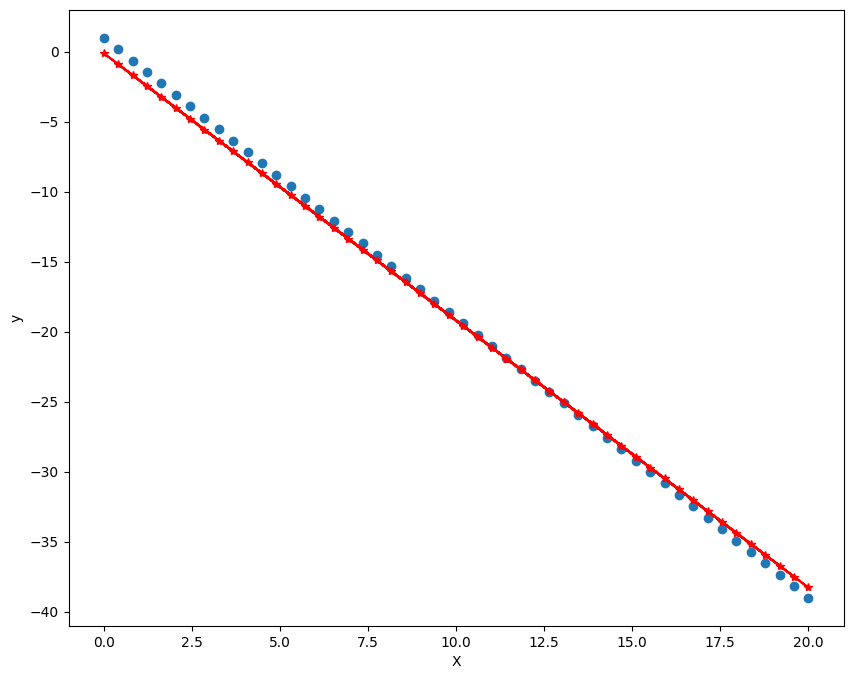

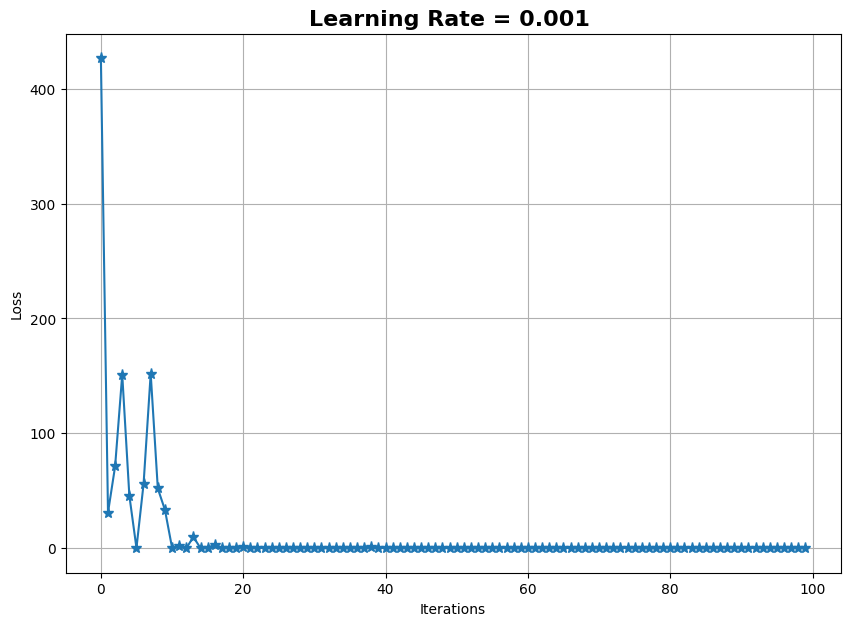

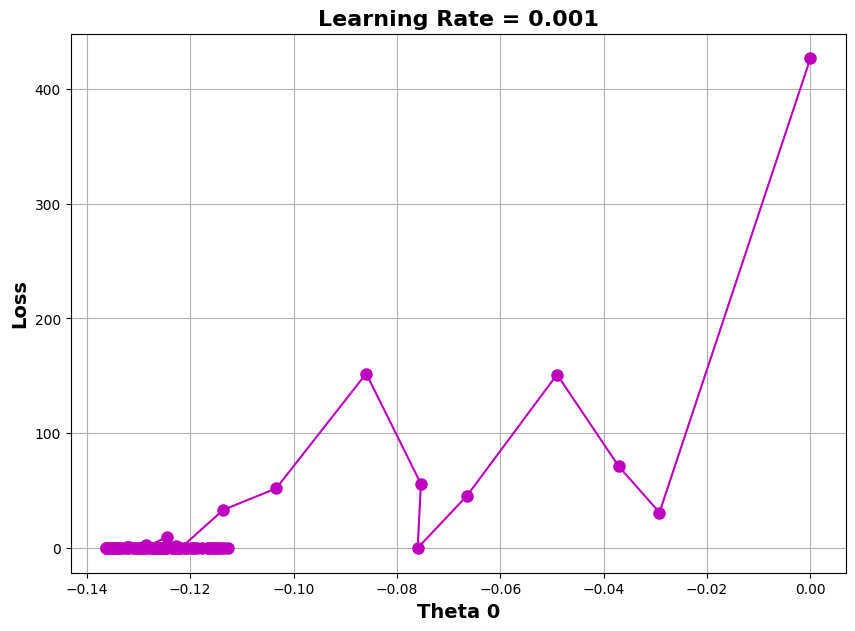

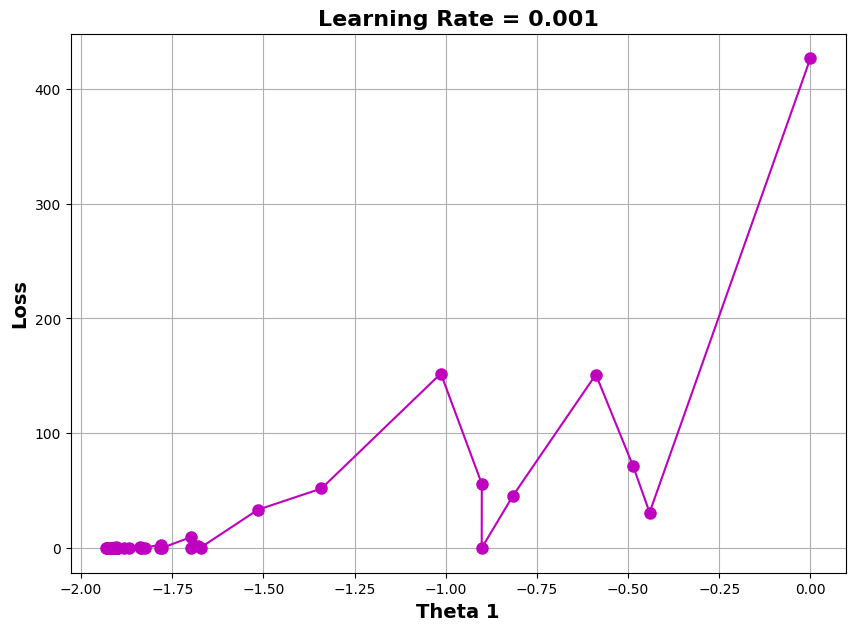

In [43]:
from sklearn.metrics import r2_score
y_best_fit= calc_best_fit(all_theta_0[-1],all_theta_1[-1],X)
print('r2_score:',r2_score(y,y_best_fit))

plotReg(X,y,y_best_fit)
plot_loss_iter(loss,'Learning Rate = 0.001 ')
plot_theta_loss(all_theta_0,'Theta 0',loss,'Learning Rate = 0.001')
plot_theta_loss(all_theta_1,'Theta 1',loss,'Learning Rate = 0.001')

### Make your implementation as a function

In [44]:
def SGD_LR_1var(X,y,alpha=0.01,max_epochs=500,grad_check=0.001,conv_check=0.001):
    
    np.random.seed(101)
    D = np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(D)
    X = D[:,0]
    y = D[:,1]
    
    theta_0 = 0
    theta_1 = 0

    m = X.shape[0]


    all_theta_0 =[]
    all_theta_1 =[]
    loss = []

    
    for i in range(max_epochs):
        print(f'****************** Epoch {i} ********************\n')
        
        for k in range(m):
            all_theta_0.append(theta_0)
            all_theta_1.append(theta_1)

            h= theta_0 + theta_1 * X[k]
              
            e = h-y[k]
            j=(e**2)/(2)
            loss.append(j)
        
        
            d_theta_0 = e
            d_theta_1 = (e*X[k])
            
            theta_0 = theta_0 - alpha * d_theta_0
            theta_1 = theta_1 - alpha * d_theta_1
            
            
            
        
        
        grad = np.array([[d_theta_0],
                         [d_theta_1]])
        print(f'j = {j}\n')
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector:\n{grad}\n')
        print(f'Gradient Vector Norm:\n{grad_norm}\n')
        opt_theta_0=all_theta_0[-1]
        opt_theta_1=all_theta_1[-1]
        print(f'theta_0_new : {opt_theta_0}')
        print(f'theta_1_new : {opt_theta_1}\n')
        
        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_0_Opt : {opt_theta_0}')
            print(f'theta_1_Opt : {opt_theta_1}\n')
            print(f'Cost = {j}\n')
            break
        elif i>0 and np.absolute(loss[-1] - loss[-51])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_0_Opt : {opt_theta_0}')
            print(f'theta_1_Opt : {opt_theta_1}\n')
            print(f'Cost = {j}\n')
            break

        

    return all_theta_0,all_theta_1,loss

### Try another Scenario For Batch and Stochastic GD
##### The following results uses the hyper-parameters alpha = 0.0001, max. epochs = 500, and 0.001 for both stop conditions.

### Batch GD

In [45]:
X,y = generate_Xy()
all_theta_0,all_theta_1,loss = GD_LR_1var(X,y,alpha=0.0001)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204087

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0019
theta_1_new : -0.02593877

r2_score: 0.9971084355454104


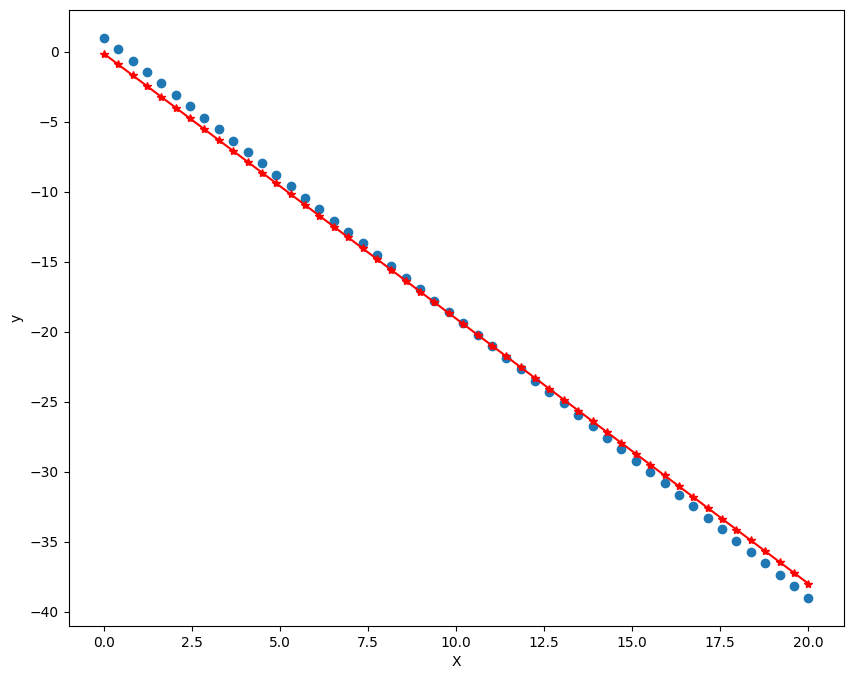

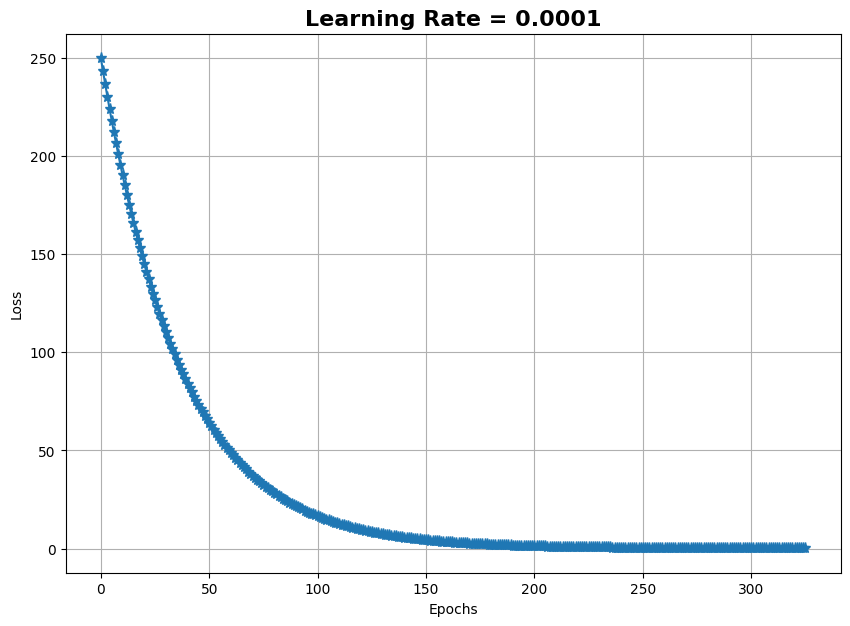

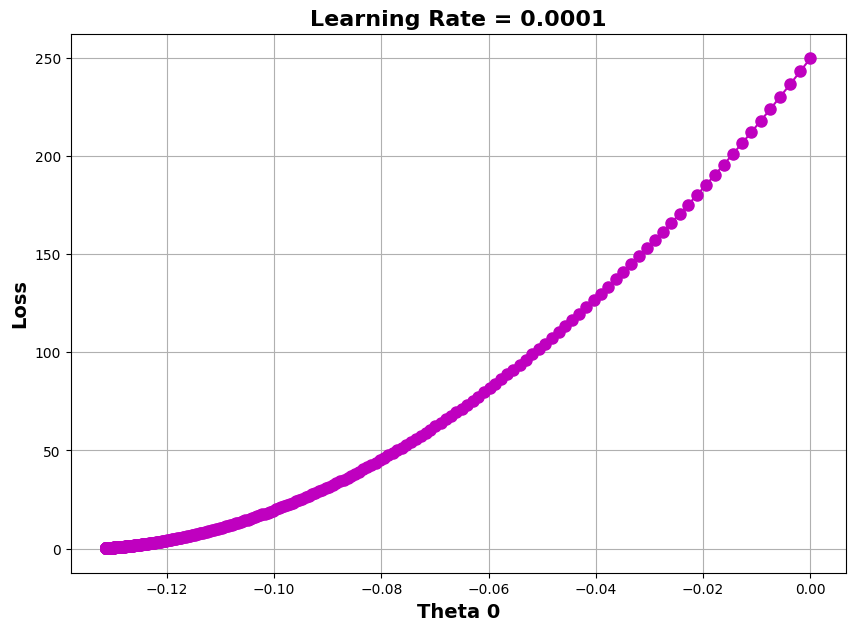

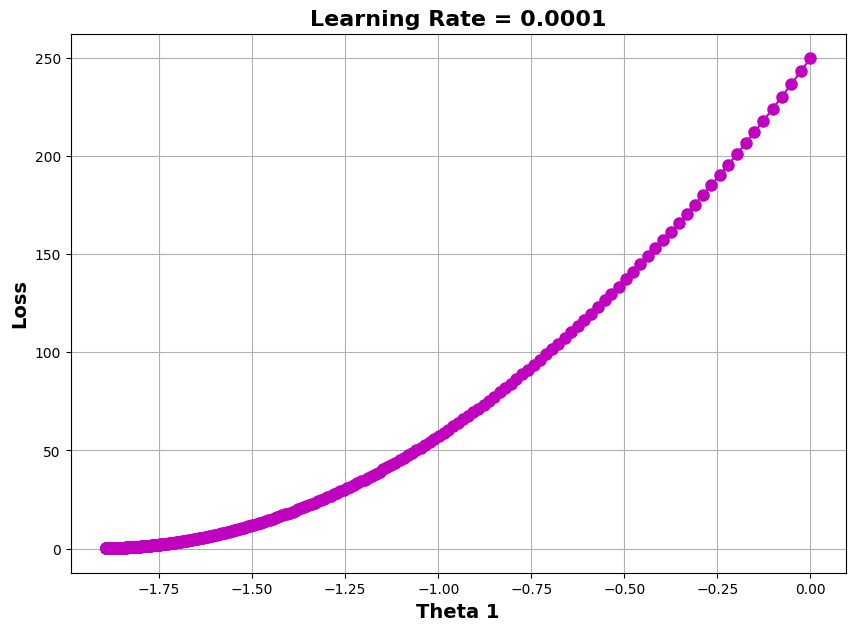

In [46]:
y_best_fit= calc_best_fit(all_theta_0[-1],all_theta_1[-1],X)
print('r2_score:',r2_score(y,y_best_fit))

plotReg(X,y,y_best_fit)
plot_loss(loss,'Learning Rate = 0.0001')
plot_theta_loss(all_theta_0,'Theta 0',loss,'Learning Rate = 0.0001')
plot_theta_loss(all_theta_1,'Theta 1',loss,'Learning Rate = 0.0001')

### Stochastic GD

In [47]:
X,y = generate_Xy()
all_theta_0,all_theta_1,loss = SGD_LR_1var(X,y,alpha=0.0001)

****************** Epoch 0 ********************

j = 77.08339441916262

Gradient Vector:
[[ 12.41639194]
 [157.10536742]]

Gradient Vector Norm:
157.59525139074904

theta_0_new : -0.06716780601894395
theta_1_new : -0.9343638264268326

****************** Epoch 1 ********************

j = 19.384194190624033

Gradient Vector:
[[ 6.22642661]
 [78.78335716]]

Gradient Vector Norm:
79.02901842704571

theta_0_new : -0.10152400082133746
theta_1_new : -1.4208555159144907

****************** Epoch 2 ********************

j = 4.830561509456486

Gradient Vector:
[[ 3.10823471]
 [39.3286841 ]]

Gradient Vector Norm:
39.45131830456044

theta_0_new : -0.1181076167547815
theta_1_new : -1.665982622480747

****************** Epoch 3 ********************

j = 1.181899543652157

Gradient Vector:
[[ 1.53746515]
 [19.45364067]]

Gradient Vector Norm:
19.514300769285008

theta_0_new : -0.12573912868814405
theta_1_new : -1.7895209521723126

****************** Epoch 4 ********************

j = 0.27842055641572

r2_score: 0.9976377310288631


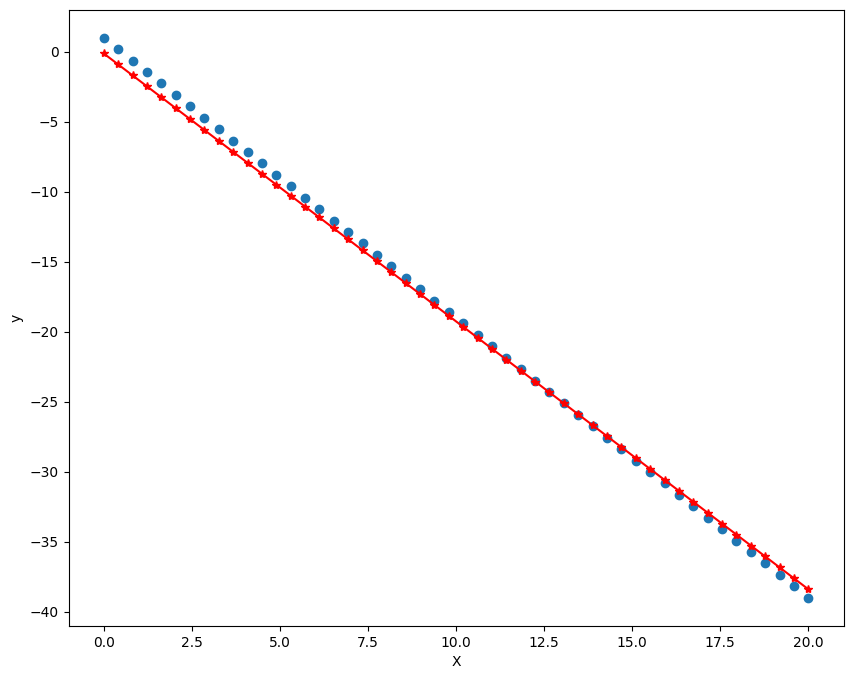

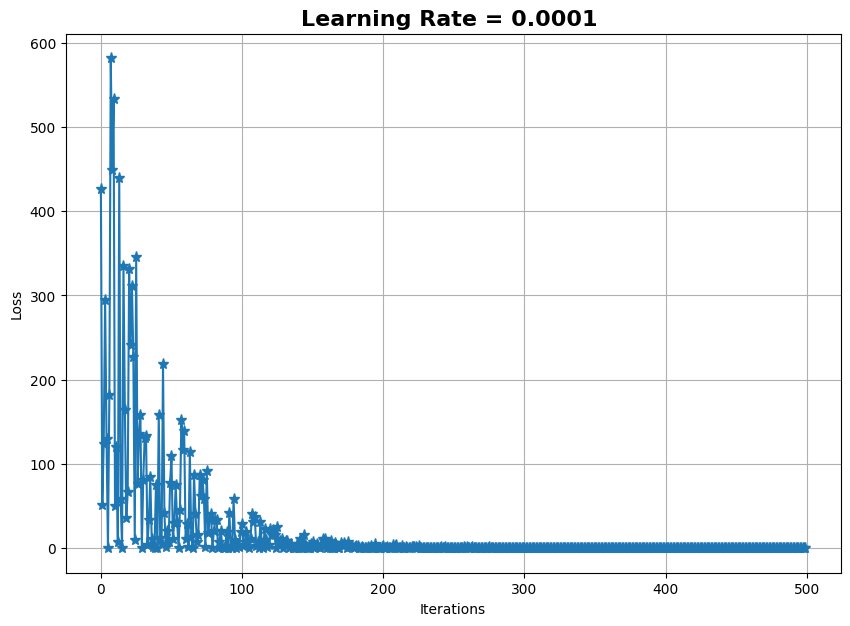

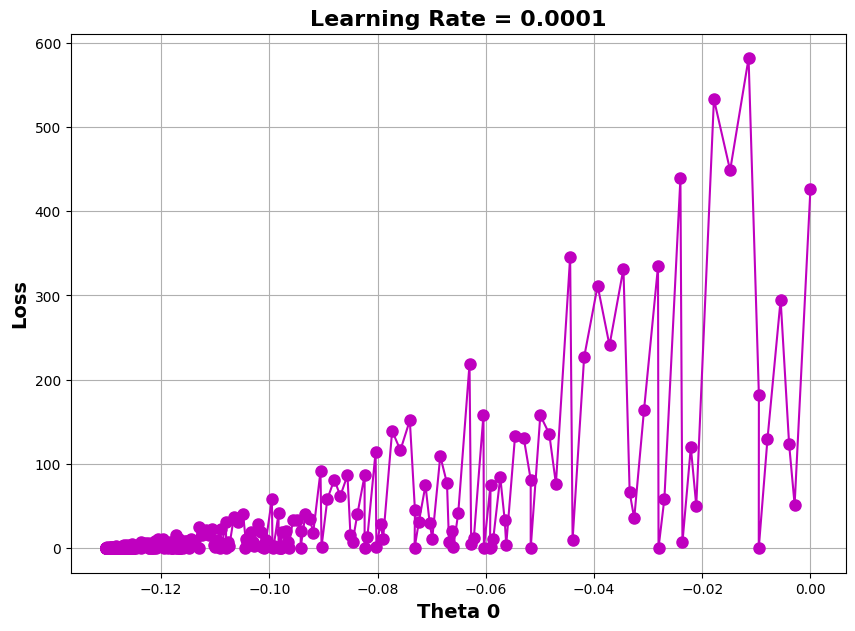

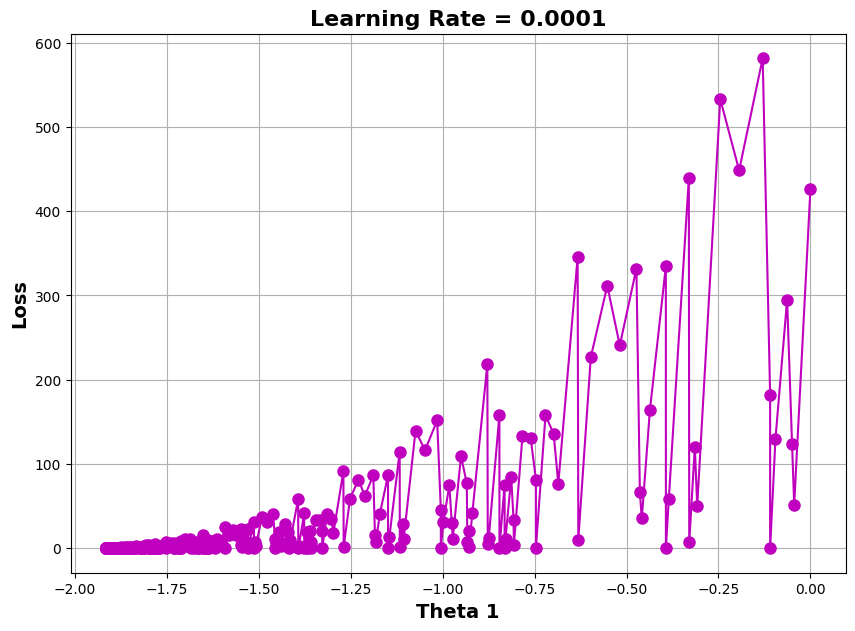

In [48]:
y_best_fit= calc_best_fit(all_theta_0[-1],all_theta_1[-1],X)
print('r2_score:',r2_score(y,y_best_fit))

plotReg(X,y,y_best_fit)
plot_loss_iter(loss,'Learning Rate = 0.0001 ')
plot_theta_loss(all_theta_0,'Theta 0',loss,'Learning Rate = 0.0001')
plot_theta_loss(all_theta_1,'Theta 1',loss,'Learning Rate = 0.0001')